In [1]:
import pandas as pd

In [2]:
df_run =pd.read_csv('http://bit.ly/running_data')
df_run =df_run[['local_start_time', 'distance', 'duration']]
df_run['local_start_time'] = df_run['local_start_time'].apply(lambda x: x.split('T')[0]) + ' ' +  df_run['local_start_time'].apply(lambda x: x.split('T')[1]).apply(lambda x: x.split('.')[0])
df_run['local_start_time'] = pd.to_datetime(df_run['local_start_time'])
df_run['year'] = df_run.local_start_time.dt.year
df_run['month'] = df_run.local_start_time.dt.month
#df_run['month2'] = df_run.local_start_time.dt.year  +  df_run.local_start_time.dt.month

#month2は年と月を足した項目。他の動画でもっとスマートな項目名を付けていたような気がする。

df_run['month2'] =df_run.year.astype(str) + df_run.month.astype(str)
df_run['day'] = df_run.local_start_time.dt.day
df_run['hour'] = df_run.local_start_time.dt.hour
df_run['min'] = df_run.local_start_time.dt.minute
df_run['local_end_time'] = df_run.local_start_time + pd.to_timedelta(df_run['duration'], unit= 's')


In [3]:
df_run.head()

,local_start_time,distance,duration,year,month,month2,day,hour,min,local_end_time
0,2019-12-06 04:42:50,6.684,2296.72,2019,12,201912,6,4,42,2019-12-06 05:21:06.720
1,2019-12-04 04:50:51,4.010,1357.35,2019,12,201912,4,4,50,2019-12-04 05:13:28.350
2,2019-11-06 04:45:29,4.000,1303.49,2019,11,201911,6,4,45,2019-11-06 05:07:12.490
3,2019-11-01 04:46:05,4.029,1282.03,2019,11,201911,1,4,46,2019-11-01 05:07:27.030
4,2019-10-24 04:43:50,4.039,1346.17,2019,10,201910,24,4,43,2019-10-24 05:06:16.170


In [81]:
df_run.groupby('month2').count().head()

,local_start_time,distance,duration,year,month,day,hour,min,local_end_time
month2,,,,,,,,,
201310,4,4,4,4,4,4,4,4,4
201311,5,5,5,5,5,5,5,5,5
201312,3,3,3,3,3,3,3,3,3
20137,4,4,4,4,4,4,4,4,4
20138,5,5,5,5,5,5,5,5,5


In [82]:
df_run.head()

,local_start_time,distance,duration,year,month,month2,day,hour,min,local_end_time
0,2019-12-06 04:42:50,6.684,2296.72,2019,12,201912,6,4,42,2019-12-06 05:21:06.720
1,2019-12-04 04:50:51,4.010,1357.35,2019,12,201912,4,4,50,2019-12-04 05:13:28.350
2,2019-11-06 04:45:29,4.000,1303.49,2019,11,201911,6,4,45,2019-11-06 05:07:12.490
3,2019-11-01 04:46:05,4.029,1282.03,2019,11,201911,1,4,46,2019-11-01 05:07:27.030
4,2019-10-24 04:43:50,4.039,1346.17,2019,10,201910,24,4,43,2019-10-24 05:06:16.170


In [83]:
df_run.duration.value_counts().head()

0.00       4
1388.00    2
3357.00    1
1930.10    1
1834.07    1
Name: duration, dtype: int64

In [79]:
#distanceが60km以上のレコードをdropを使って削除する。indexを使う必要がある。
rows_to_drop = df_run.index[df_run["distance"] >= 60]
df_run.drop(rows_to_drop).max()


local_start_time           2019-12-06 04:42:50
distance                                10.866
duration                                  6559
year                                      2019
month                                       12
month2                                   20199
day                                         31
hour                                        22
min                                         59
local_end_time      2019-12-06 05:21:06.720000
dtype: object

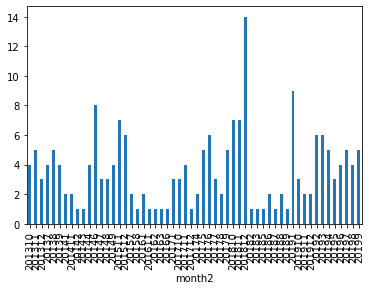

In [80]:
df_run.groupby('month2').count().distance.plot.bar()


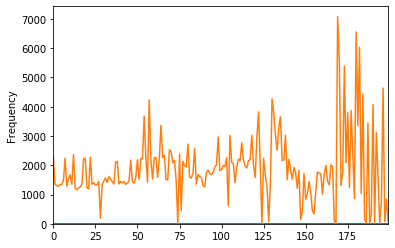

In [32]:
df_run.duration.plot(kind='hist')
df_run.duration.plot()
